# PHE   Data Science Module — Jupyter Notebooks, Doula Training, and Framingham Heart Study Data Set

---

![](DSHeaderMillsLarge.png)


### Professors Susan Wang and Catrina Jaime

In this module we encounter our first Jupyter Notebook and learn the basics of the structure a Jupyter Notebook and how to work with it. Further description needed ...

---
## Introduction to Jupyter Notebooks 

In this module we are using a document called a **Jupyter Notebook** which is an *interactive* document containing text, code, visualizations, and more.  In this section, we introduce some of the building blocks of a notebook and how to work with it.

Now click anywhere near this paragraph.  What you see is a rectangle box around this paragraph.  This rectangle is called a **cell**. A notebook is composed of two kinds of cells: **markdown** and **code**. 

#### Markdown Cells

A markdown cell, such as this one, contains text. You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in Markdown, a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text-editing mode by running the cell. To run (or execute the commands) in a cell, you first select it, and

press Ctrl+Enter (run the cell and stay at the same cell) or
click the Run button in the toolbar at the top of the screen (run the cell and go to the next cell)
Now try edit and then run the following Markdown cell:

My favorite animal is (you fill in this part)

#### Code Cells

A **code cell**, such as the next one, contains commands in Python, a programming language that we will be using for the data science module. A code cell has `In [ ]:` to the left of the cell (that is how you distinguish a code cell).  
   
If a code cell is running, you will see an asterisk `*` appear in the square brackets to the left of the cell. Once the cell has finished running, a number (which will increment) will replace the asterisk and any output from the code will appear under the cell. The output of a code cell may include computations, tables, graphs, or other visualizations.

In [1]:
# This is a code cell; run this cell (Ctrl+Enter)
print('Welcome to Data Science PHE Module!')

You'll notice that many code cells contain lines of greenish-blue italic text that start with a `#`. These are comments. Comments often contain helpful information about what the code does or what you are supposed to do in the cell. The leading # tells the computer to ignore them.

To edit a Code cell, just click at the location where edit should take place and start typing/editing. 

Now try edit and then run the following Code cell:

In [2]:
# replace ... with your personal message, then run the cell (Ctrl+Enter)
print(' ... ')

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any tables and graphs you generate or calculations you make, which we will see in our next Jupyter Notebook. You can save the notebook in its current state by clicking <code>Ctrl+S</code>, clicking the floppy disc icon in the toolbar at the top, left of the page, or by going to the File menu and selecting "Save and Checkpoint".

The next time you open the notebook, it will look the same as when you last saved it. 

**Note**: after loading a notebook you will see all the outputs (tables, graphs, computation, widgets, etc) from your last session, but you won't be able to use any libraries you imported, variables you assigned, functions you defined, or widgets you created. To get back to your previous state, you will need to *re-run* the cells where you imported the libraries, defined the variables and functions. The easiest way is to select the cell where you left off work, then go to the Cell menu at the top of the screen and select "Run All Above".

---
## Doula Training Survey Data

In [3]:
import pandas as pd
import pylab
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline  
# display charts inline
mpl.style.use('ggplot') # optional: for ggplot-like style
# For widgets to work
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual 
from IPython.display import Image, display
import collections
#import graphs_survey
plt.style.use('fivethirtyeight')

#You may need to insatll 
#!pip install plotly
!pip install cufflinks 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.14.3


## Reading in the Survey Data

In [4]:
pre = pd.read_excel('PHE180BSurveyDataTW10.24.20.xlsx', sheet_name='Pre_TextFile')
post = pd.read_excel('PHE180BSurveyDataTW10.24.20.xlsx', sheet_name='Post_Textfile')
pre.head(2)

,Timestamp,Mills Banner ID:,"1.1) I feel I have the knowledge to provide doula services at a hospital, birth center, or home setting.",1.2) I feel this doula training will provide me with a beneficial skill set.,1.3) I would recommend doula training to other students at Mills.,1.4) I believe this doula training will empower me to support my community.,"2.1) Communicate with a pregnant person and their family about what they can expect during a pregnancy, labor, childbirth, postpartum period, abortion procedure, or similar reproductive experience.",2.2) Communicate with a family about what they can expect during an adoption or fostering process.,2.3) Communicate with someone about their thoughts relating to reproductive processes.,2.4) Provide effective physical comfort measures to someone in labor.,...,Why did you decide to enroll in this course?,What knowledge and skills do you want to learn or gain from taking this course?,What interest would you have in an internship opportunity after completing this course?,How do you think you will apply what you learned in this course in the future?,Current Major/Degree in progress:,What is your age?,4.1) What is your class standing?,4.2) How do you identify your race/ethnicity? (Check all that apply),How do you describe yourself? (Check all that apply),Which of the following best describes your feelings surrounding your sexual orientation?
0,2020-10-11 19:13:00.312,B00502608,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,Not at all confident,Very confident,Not at all confident,...,I have wanted to work directly with laboring p...,- How to support families physically\n- Cultur...,Big interest,I will fight for legislation that recognizes d...,Liberal Studies,NaN,First-Year,White or Caucasian,"Binary - female, Non-Binary",Queer
1,2020-10-11 19:17:39.718,B00495546,Strongly disagree,Strongly agree,Agree,Strongly agree,A little bit confident,Very confident,Very confident,Not at all confident,...,"I enrolled in this course, because I want to b...",I want to gain skills that will make me more c...,I would be 100% interested.,I hope to be working closely with mothers in a...,B.A. Environmental Science,21.0,Sophomore,Hispanic or Latinx,Binary - female,Pansexual


## Survey Questions

In [5]:
# List the pre-survey questions 
pre_labels = list(pre.columns)
pre_labels

['Timestamp',
 'Mills Banner ID:',
 '1.1) I feel I have the knowledge to provide doula services at a hospital, birth center, or home setting.',
 '1.2) I feel this doula training will provide me with a beneficial skill set.',
 '1.3) I would recommend doula training to other students at Mills.',
 '1.4) I believe this doula training will empower me to support my community.',
 '2.1) Communicate with a pregnant person and their family about what they can expect during a pregnancy, labor, childbirth, postpartum period, abortion procedure, or similar reproductive experience.',
 '2.2) Communicate with a family about what they can expect during an adoption or fostering process.',
 '2.3) Communicate with someone about their thoughts relating to reproductive processes.',
 '2.4) Provide effective physical comfort measures to someone in labor.',
 '2.5) Provide effective emotional support to someone in labor.',
 '2.6) Facilitate communication between a laboring person and their healthcare team. ',
 

In [6]:
# List the post-survey questions 
post_labels = list(post.columns)
post_labels

['Timestamp',
 '1.1) I feel I have the knowledge to provide doula services at a hospital, birth center, or home setting.',
 '1.2) I feel this doula training provided me with a beneficial skill set.',
 '1.3) I would recommend doula training to other students at Mills.',
 '1.4) I believe this doula training empowered me to support my community.',
 '2.1) Communicate with a pregnant person and their family about what they can expect during a pregnancy, labor, childbirth, postpartum period, abortion procedure, or similar reproductive experience.',
 '2.2) Communicate with a family about what they can expect during an adoption or fostering process.',
 '2.3) Communicate with someone about their thoughts relating to reproductive processes.',
 '2.4) Provide effective physical comfort measures to someone in labor.',
 '2.5) Provide effective emotional support to someone in labor.',
 '2.6) Facilitate communication between a laboring person and their healthcare team. ',
 '2.7) Advocate for a person’

## Cleaning the Survey Data

In [7]:
# Clean the pre-survey data 
# Select questions in pre-survey with responses from preset selection
orig_pre_q_labels = pre_labels[2:20]
new_pre_q_labels = ['pre1.1', 'pre1.2', 'pre1.3', 'pre1.4', 'pre2.1', 'pre2.2', 'pre2.3', 'pre2.4','pre2.5', 'pre2.6', 'pre2.7','pre2.8','pre3.1', 'pre3.2', 'pre3.3', 'pre3.4', 'pre3.5', 'pre3.6']
pre_q_dict = dict(zip(orig_pre_q_labels, new_pre_q_labels))

# Rename (shorten) column names 
pre.rename(columns=pre_q_dict, inplace=True) 
pre.rename(columns={'Mills Banner ID:' : 'ID'}, inplace=True)
pre.rename(columns= {'4.2) How do you identify your race/ethnicity? (Check all that apply)': 'Race/Ethnicity'}, inplace=True)

# Create a new table with survey responses, ID, and race/ethnicity
pre_tbl = pre.iloc[:,2:20]
pre_tbl['ID'] = pre['ID']
pre_tbl['Race/Ethnicity'] = pre['Race/Ethnicity']
pre_tbl.head(5)

,pre1.1,pre1.2,pre1.3,pre1.4,pre2.1,pre2.2,pre2.3,pre2.4,pre2.5,pre2.6,pre2.7,pre2.8,pre3.1,pre3.2,pre3.3,pre3.4,pre3.5,pre3.6,ID,Race/Ethnicity
0,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,Not at all confident,Very confident,Not at all confident,Very confident,A little bit confident,Not at all confident,Very confident,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,B00502608,White or Caucasian
1,Strongly disagree,Strongly agree,Agree,Strongly agree,A little bit confident,Very confident,Very confident,Not at all confident,A little bit confident,Very confident,Very confident,Somewhat confident,Very likely,Very likely,Very likely,Uncertain,Somewhat unlikely,Uncertain,B00495546,Hispanic or Latinx
2,Disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,A little bit confident,Very confident,A little bit confident,Somewhat confident,Somewhat confident,Somewhat confident,Confident,Very likely,Somewhat likely,Somewhat likely,Uncertain,Uncertain,Somewhat unlikely,B00499977,White or Caucasian
3,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,Not at all confident,A little bit confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Very likely,Very likely,Uncertain,Uncertain,Somewhat likely,Somewhat likely,B00498026,"Hispanic or Latinx, Middle-Eastern, Multi-raci..."
4,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Not at all confident,Not at all confident,A little bit confident,Not at all confident,Not at all confident,A little bit confident,A little bit confident,Not at all confident,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,B00495558,Hispanic or Latinx


In [8]:
# Similarly clean the post-survey data 
orig_post_q_labels = post_labels[1:22]
new_post_q_labels = ['post1.1', 'post1.2', 'post1.3', 'post1.4', 'post2.1', 'post2.2', 'post2.3', 'post2.4', 'post2.5', 'post2.6', 'post2.7','post2.8','post3.1', 'post3.2', 'post3.3', 'post3.4', 'post3.5', 'post3.6', 'post3.7', 'post3.8' , 'post3.9']
post_q_dict = dict(zip(orig_post_q_labels, new_post_q_labels))

post.rename(columns=post_q_dict, inplace=True) 
post.rename(columns={'Mills Banner ID:' : 'ID'}, inplace=True)

# Select a few columns 
post_tbl = post.iloc[:,1:22]
post_tbl['ID'] = post['ID']
post_tbl.head(5)

,post1.1,post1.2,post1.3,post1.4,post2.1,post2.2,post2.3,post2.4,post2.5,post2.6,...,post3.1,post3.2,post3.3,post3.4,post3.5,post3.6,post3.7,post3.8,post3.9,ID
0,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Confident,Somewhat confident,Confident,Very confident,Very confident,Very confident,...,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,B00495496
1,Agree,Strongly agree,Strongly agree,Agree,Confident,Somewhat confident,Confident,Confident,Very confident,Confident,...,Somewhat likely,Somewhat likely,Somewhat likely,Somewhat likely,Very likely,Very likely,Very likely,Very likely,Very likely,B00465879
2,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,A little bit confident,Very confident,Confident,Confident,Very confident,...,Very likely,Very likely,Very likely,Very likely,Somewhat likely,Somewhat likely,Somewhat likely,Very likely,Very likely,B00498304
3,Neither agree nor disagree,Agree,Agree,Agree,A little bit confident,A little bit confident,A little bit confident,A little bit confident,Somewhat confident,Somewhat confident,...,Uncertain,Very likely,Very likely,Very likely,Somewhat likely,Somewhat likely,Somewhat unlikely,Very likely,Very likely,B00496428
4,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Very confident,Confident,Very confident,Confident,Very confident,Very confident,...,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Somewhat likely,Very likely,Very likely,B00499944


In [9]:
# Merge pre and post tables keeping only those participants who responded to both surveys
data = pd.merge(left=pre_tbl, right=post_tbl, left_on='ID', right_on='ID')
data

,pre1.1,pre1.2,pre1.3,pre1.4,pre2.1,pre2.2,pre2.3,pre2.4,pre2.5,pre2.6,...,post2.8,post3.1,post3.2,post3.3,post3.4,post3.5,post3.6,post3.7,post3.8,post3.9
0,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,Not at all confident,Very confident,Not at all confident,Very confident,A little bit confident,...,Very confident,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely
1,Strongly disagree,Strongly agree,Agree,Strongly agree,A little bit confident,Very confident,Very confident,Not at all confident,A little bit confident,Very confident,...,Somewhat confident,Somewhat likely,Somewhat likely,Very likely,Very likely,Uncertain,Somewhat likely,Uncertain,Very likely,Very likely
2,Disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,A little bit confident,Very confident,A little bit confident,Somewhat confident,Somewhat confident,...,Very confident,Uncertain,Uncertain,Very likely,Very likely,Somewhat likely,Somewhat likely,Uncertain,Somewhat likely,Somewhat likely
3,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat confident,Not at all confident,A little bit confident,Not at all confident,Not at all confident,Not at all confident,...,Very confident,Very likely,Very likely,Somewhat likely,Very likely,Somewhat unlikely,Uncertain,Somewhat unlikely,Uncertain,Very unlikely
4,Disagree,Strongly agree,Strongly agree,Strongly agree,A little bit confident,Not at all confident,A little bit confident,Not at all confident,A little bit confident,Somewhat confident,...,Very confident,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Somewhat likely,Very likely,Very likely
5,Strongly disagree,Agree,Agree,Agree,Somewhat confident,Not at all confident,Somewhat confident,A little bit confident,A little bit confident,Not at all confident,...,Very confident,Somewhat likely,Somewhat likely,Somewhat likely,Somewhat likely,Very likely,Very likely,Very likely,Very likely,Very likely
6,Disagree,Strongly agree,Agree,Strongly agree,Not at all confident,Not at all confident,A little bit confident,A little bit confident,Somewhat confident,A little bit confident,...,Very confident,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely,Very likely
7,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Not at all confident,Not at all confident,Somewhat confident,A little bit confident,A little bit confident,Not at all confident,...,Very confident,Very likely,Very likely,Very likely,Very likely,Somewhat likely,Somewhat likely,Somewhat likely,Very likely,Very likely
8,Strongly disagree,Agree,NaN,Neither agree nor disagree,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,...,Somewhat confident,Uncertain,Very likely,Very likely,Very likely,Somewhat likely,Somewhat likely,Somewhat unlikely,Very likely,Very likely
9,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly agree,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,Not at all confident,...,Very confident,Somewhat likely,Very likely,Very likely,Very likely,Uncertain,Uncertain,Somewhat likely,Somewhat likely,Very likely


## Quantifying the Responses

In [10]:
# Convert responses to numerical values
scale = {'Strongly disagree':1, 'Disagree':2,'Neither agree nor disagree':0, 'Agree':3,'Strongly agree': 4,\
      'Not at all confident':0,'A little bit confident':1,'Somewhat confident':2,'Confident':3,'Very confident':4,\
      'Very unlikely': 0, 'Somewhat unlikely':1,'Uncertain':2, 'Somewhat likely':3, 'Very likely':4}
data.replace(scale, inplace=True)
data

,pre1.1,pre1.2,pre1.3,pre1.4,pre2.1,pre2.2,pre2.3,pre2.4,pre2.5,pre2.6,...,post2.8,post3.1,post3.2,post3.3,post3.4,post3.5,post3.6,post3.7,post3.8,post3.9
0,1,4,4.0,4,2,0,4,0,4,1,...,4,4,4,4,4,4,4,4,4,4
1,1,4,3.0,4,1,4,4,0,1,4,...,2,3,3,4,4,2,3,2,4,4
2,2,4,4.0,4,2,1,4,1,2,2,...,4,2,2,4,4,3,3,2,3,3
3,3,4,4.0,4,2,0,1,0,0,0,...,4,4,4,3,4,1,2,1,2,0
4,2,4,4.0,4,1,0,1,0,1,2,...,4,4,4,4,4,4,4,3,4,4
5,1,3,3.0,3,2,0,2,1,1,0,...,4,3,3,3,3,4,4,4,4,4
6,2,4,3.0,4,0,0,1,1,2,1,...,4,4,4,4,4,4,4,4,4,4
7,1,4,4.0,4,0,0,2,1,1,0,...,4,4,4,4,4,3,3,3,4,4
8,1,3,NaN,0,0,0,0,0,0,0,...,2,2,4,4,4,3,3,1,4,4
9,1,4,0.0,4,0,0,0,0,0,0,...,4,3,4,4,4,2,2,3,3,4


## Computing the Average of Pre and Post Survey Responses

In [11]:
data.describe()

,pre1.1,pre1.2,pre1.3,pre1.4,pre2.1,pre2.2,pre2.3,pre2.4,pre2.5,pre2.6,...,post2.8,post3.1,post3.2,post3.3,post3.4,post3.5,post3.6,post3.7,post3.8,post3.9
count,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.545455,3.818182,3.200000,3.545455,1.090909,0.454545,1.818182,0.363636,1.272727,1.090909,...,3.636364,3.272727,3.636364,3.818182,3.909091,2.909091,3.181818,2.636364,3.636364,3.545455
std,0.687552,0.404520,1.229273,1.213560,0.943880,1.213560,1.537412,0.504525,1.190874,1.300350,...,0.809040,0.786245,0.674200,0.404520,0.301511,1.044466,0.750757,1.120065,0.674200,1.213560
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0.000000
25%,1.000000,4.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,...,4.000000,3.000000,3.500000,4.000000,4.000000,2.000000,3.000000,2.000000,3.500000,4.000000
50%,1.000000,4.000000,3.500000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,4.000000,4.000000,4.000000,2.000000,0.000000,3.000000,1.000000,2.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000,4.000000
max,3.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,1.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [12]:
# Compute the average of responses for q1.1-q1.4 & q2.1-q2.8
pre_averages = round(data.iloc[:,0:12].mean(),3).array
post_averages= round(data.iloc[:,20:32].mean(),3).array 
diff = (post_averages - pre_averages) 
diff

# Create a new dataframe to store the averages and difference
questions = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q2.1', 'Q2.2','Q2.3', 'Q2.4', 'Q2.5', 'Q2.6', 'Q2.7', 'Q2.8']
new_data = {'Pre-Course Average': pre_averages, "Post-Course Average" : post_averages, "Difference (Post - Pre)" : diff}

df = pd.DataFrame(new_data, index=questions)
df

,Pre-Course Average,Post-Course Average,Difference (Post - Pre)
Q1.1,1.545,2.636,1.091
Q1.2,3.818,3.727,-0.091
Q1.3,3.200,3.636,0.436
Q1.4,3.545,3.636,0.091
Q2.1,1.091,2.818,1.727
Q2.2,0.455,1.727,1.272
Q2.3,1.818,3.300,1.482
Q2.4,0.364,3.000,2.636
Q2.5,1.273,3.545,2.272
Q2.6,1.091,2.909,1.818


## Visualizing the Change in Confidence Level

In [13]:
df_Q2 = df.iloc[4:12,:]  # choose x-axis, 8 questions in Q2
df_plot= df_Q2[['Pre-Course Average', 'Post-Course Average']]
colors = ["turquoise", "cornflowerblue"]
df_plot.iplot(kind="bar", color=colors, title = 'Change in Confidence Providing Doula Services (n = 11)', 
              yTitle = 'Confidence Level (scale: 0-4)')

In [14]:
print("Survey Questions on Confidence")
for x in pre_labels[6:14]:
    print(x)

Survey Questions on Confidence
2.1) Communicate with a pregnant person and their family about what they can expect during a pregnancy, labor, childbirth, postpartum period, abortion procedure, or similar reproductive experience.
2.2) Communicate with a family about what they can expect during an adoption or fostering process.
2.3) Communicate with someone about their thoughts relating to reproductive processes.
2.4) Provide effective physical comfort measures to someone in labor.
2.5) Provide effective emotional support to someone in labor.
2.6) Facilitate communication between a laboring person and their healthcare team. 
2.7) Advocate for a person’s needs and desires to their healthcare team during labor, childbirth, the immediate postpartum period, and abortion procedures. 
2.8) Describe the benefits of doula support to others.


## Demographic Data

In [15]:
# List participants' races/ethnicities data 
data['Race/Ethnicity']

0                                    White or Caucasian
1                                    Hispanic or Latinx
2                                    White or Caucasian
3     Hispanic or Latinx, Middle-Eastern, Multi-raci...
4                                    White or Caucasian
5     Hispanic or Latinx, White or Caucasian, Multi-...
6                             Black or African American
7             Native Hawaiian or Other Pacific Islander
8                             Black or African American
9                             Black or African American
10                            Black or African American
Name: Race/Ethnicity, dtype: object

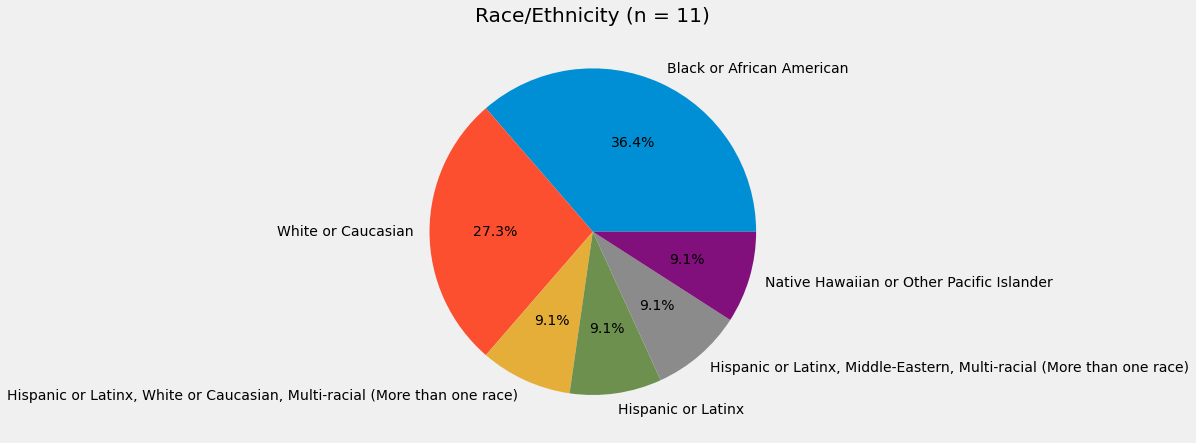

In [16]:
# Visualize race/ethnicity data as a pie chart
race_percentages = round((data['Race/Ethnicity'].value_counts()/data['Race/Ethnicity'].count())*100,2)  
race_percentages.plot(kind='pie', figsize=(18,7),autopct='%.1f%%')
plt.title('Race/Ethnicity (n = 11)')
pylab.ylabel('')  # remove series name on the left side
plt.show()

In [17]:
# Separate table data into black and non-black participants 
black = data[data['Race/Ethnicity'] == 'Black or African American']
non_black = data[data['Race/Ethnicity'] != 'Black or African American']

# Focus on questions Q 2.4 to Q 2.8  
pre_average_black= round(black.iloc[:,8:13].mean(),2).array
post_average_black= round(black.iloc[:,27:32].mean(),2).array 
diff_black = (post_average_black - pre_average_black) 

pre_average_non_black= round(non_black.iloc[:,8:13].mean(),2).array
post_average_non_black= round(non_black.iloc[:,27:32].mean(),2).array 
diff_non_black = (post_average_non_black - pre_average_non_black) 

# Create a new dataframe
questions_race = ['Q2.4', 'Q2.5', 'Q2.6', 'Q2.7', 'Q2.8']
new_data_black = {'Pre-Course Average': pre_average_black, "Post-Course Average" : post_average_black, "Post-pre Difference" : diff_black}
new_data_non_black = {'Pre-Course Average': pre_average_non_black, "Post-Course Average" : post_average_non_black, "Post-pre Difference" : diff_non_black}

# Black participants (Questions 2.4 to 2.8)
df_black = pd.DataFrame(new_data_black, index=questions_race)

# Non black participants (Questions 2.4 to 2.8)
df_non_black = pd.DataFrame(new_data_non_black, index=questions_race)

# Create df for questions (Black and Non-Black)
def get_Q_df(i):
    rows = ['Pre' , "Post"]
    col_data = {'Black': [df_black.iloc[i,0], df_black.iloc[i,1]], 'Non-Black': [df_non_black.iloc[i,0], df_non_black.iloc[i,1]] }
    return pd.DataFrame(col_data, index=rows)

Q = list()  # create an empty list, where items will be 5 dataframes corresponding Q2.4 to Q2.8
for i in range(5):
    Q.append(get_Q_df(i))

print('Black\n', df_black, '\n\nNon-Black\n', df_non_black)
print('\nQ2.4\n',Q[0], '\n\nQ2.5\n',Q[1], '\n\nQ2.6\n',Q[2], '\n\nQ2.7\n',Q[3], '\n\nQ2.8\n',Q[4])

Black
       Pre-Course Average  Post-Course Average  Post-pre Difference
Q2.4                1.00                  3.0                 2.00
Q2.5                0.75                  3.5                 2.75
Q2.6                0.50                  3.0                 2.50
Q2.7                0.75                  3.0                 2.25
Q2.8                3.50                  3.5                 0.00 

Non-Black
       Pre-Course Average  Post-Course Average  Post-pre Difference
Q2.4                1.43                 3.00                 1.57
Q2.5                1.29                 3.57                 2.28
Q2.6                1.29                 2.86                 1.57
Q2.7                1.86                 2.86                 1.00
Q2.8                3.71                 3.71                 0.00

Q2.4
       Black  Non-Black
Pre     1.0       1.43
Post    3.0       3.00 

Q2.5
       Black  Non-Black
Pre    0.75       1.29
Post   3.50       3.57 

Q2.6
       Black  No

In [18]:
# pre_labels[9:14] contain the set of question from 2.4 to 2.8
a = {'Q2.4 Physical Comfort': Q[0], 'Q2.5 Emotional Support': Q[1], 'Q2.6 Facilitate Communication': Q[2], 
     'Q2.7 Advocate for Another': Q[3], 'Q2.8 Describe Benefits': Q[4]}

the_questions = dict() # dict that associates short version of the questions to long version 
j = 9
for i in a:
    the_questions[i] = pre_labels[j]
    j = j +1

def plot_Q(Question):
    #print(the_questions[Question])  # print the long original question
    Q = a[Question]
    #print('\n',Q)
    Q.iplot(kind="bar", dimensions=(700, 300), title = the_questions[Question]);
    #Q.plot(kind="bar", title = the_questions[Question])
    
# Create a dropdown menu to select a question 
q = widgets.Dropdown(options= ['Q2.4 Physical Comfort' , 'Q2.5 Emotional Support', 'Q2.6 Facilitate Communication', 
                               'Q2.7 Advocate for Another', 'Q2.8 Describe Benefits'], value='Q2.4 Physical Comfort')
display(widgets.interactive(plot_Q, Question = q))

interactive(children=(Dropdown(description='Question', options=('Q2.4 Physical Comfort', 'Q2.5 Emotional Suppo…

## Visualizing Post-course Responses
#### 3.3) Volunteer your time as a doula to your community.

Choices are: Very Likely, Somewhat Likely, Uncertain, Somewhat Unlikely, Very Unlikely


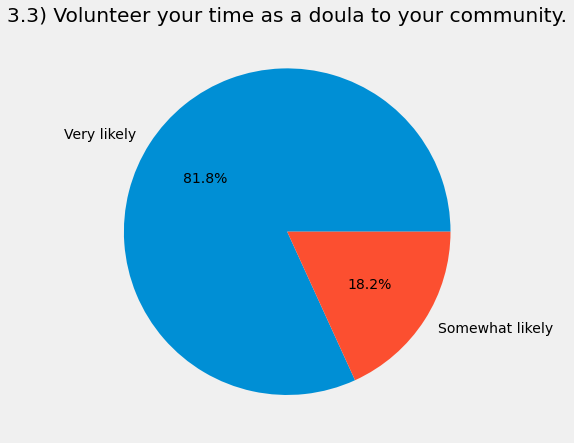

In [19]:
raw_data = pd.merge(left=pre_tbl, right=post_tbl, left_on='ID', right_on='ID')
print('Choices are: Very Likely, Somewhat Likely, Uncertain, Somewhat Unlikely, Very Unlikely')
percentages3_3 = round((raw_data['post3.3'].value_counts()/raw_data['post3.3'].count())*100,2) # series 
percentages3_3.plot(kind='pie', figsize=(18,7),autopct='%.1f%%')
plt.title('3.3) Volunteer your time as a doula to your community.')
pylab.ylabel('') 
plt.show()

#### 3.9) Utilize doula skills gained in this training (such as client-centered care, supportive communication and active listening, cultural responsiveness, accountability, and evidence-based education) in future clinical healthcare.

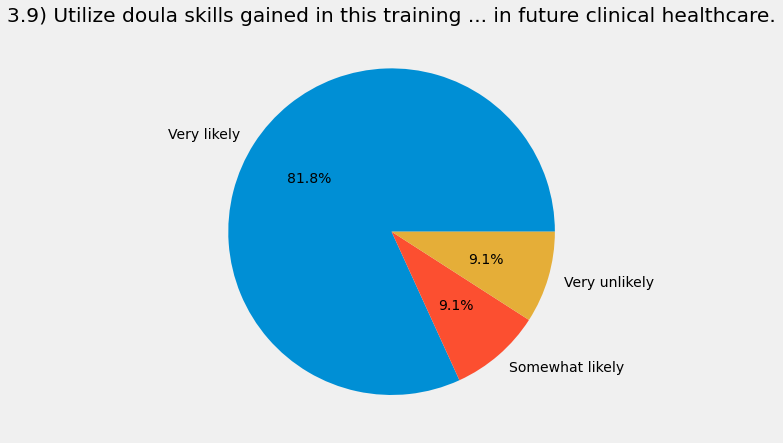

In [20]:
percentages3_9 = round((raw_data['post3.9'].value_counts()/raw_data['post3.9'].count())*100,2)
percentages3_9.plot(kind='pie', figsize=(18,7), autopct='%.1f%%')
plt.title('3.9) Utilize doula skills gained in this training ... in future clinical healthcare.')
pylab.ylabel('') 
plt.show()

---

Notebook developed by: Susan Wang and Almudena Konrad